In [1]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from visualizingData import *
from clipping import *
import os

In [2]:
# Load the data from the specified .npz file
file = np.load(".\\provided_data\\QTOF.npz", allow_pickle=True)

# # Extract the necessary components from the file
print(file.files)

selected_B = file['selected_B'][()]
shape = file['shape'][()]
mz_values = file['mz'][()]



['selected_B', 'shape', 'mz']


In [3]:
selected_B.nnz/np.prod(selected_B.shape)


0.09466149611367851

nu al klaar met nans


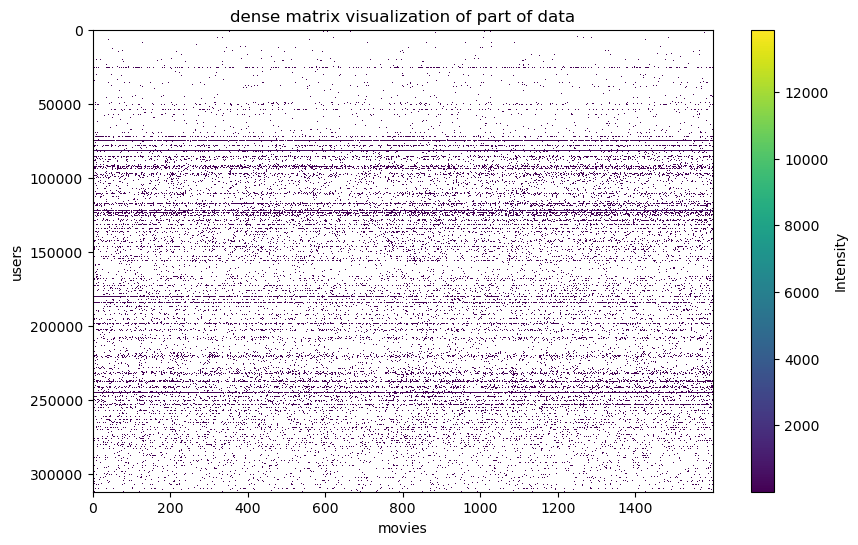

In [4]:
# als je de sims of qtof om will zetten in een matrix die je miss wilt zien
dense_matrix_format = selected_B.toarray()
nans_matrix=np.where(dense_matrix_format==0, np.nan, dense_matrix_format)
print('nu al klaar met nans')
visualizeData(nans_matrix)

In [6]:
dense_matrix_format = dense_matrix_format.T
nans_matrix = nans_matrix.T

In [7]:
shape

array([40, 40], dtype=int64)

In [8]:

mb = find_massbins(dense_matrix_format)
print(len(mb))

46


In [9]:
mb

[0,
 2,
 6,
 7,
 17,
 21,
 26,
 27,
 31,
 59,
 60,
 61,
 62,
 390,
 391,
 392,
 393,
 1026,
 1027,
 4762,
 5386,
 6006,
 6007,
 6008,
 6009,
 19841,
 19842,
 29894,
 29895,
 37691,
 37692,
 49008,
 49009,
 49541,
 81442,
 81443,
 86893,
 86894,
 87125,
 87126,
 97083,
 97084,
 97085,
 123251,
 123252,
 123253]

In [10]:

def visualizeMassBin(dense_matrix, massbin,shape):
    picturematrix = dense_matrix[:, massbin].reshape(shape)
    # Plot each matrix with its respective colormap
    fig, ax = plt.subplots()
    cax = ax.imshow(picturematrix, aspect='equal', cmap='cubehelix', interpolation='none')  # Set aspect to 'equal' and use same limits as original data
    ax.set_title(f'Massbin {massbin} Colormap')
    fig.colorbar(cax, ax=ax)
    
    # Add overall title and show the plot
    fig.suptitle(f'Data of Massbin {massbin}', fontsize=16)
    plt.show() 

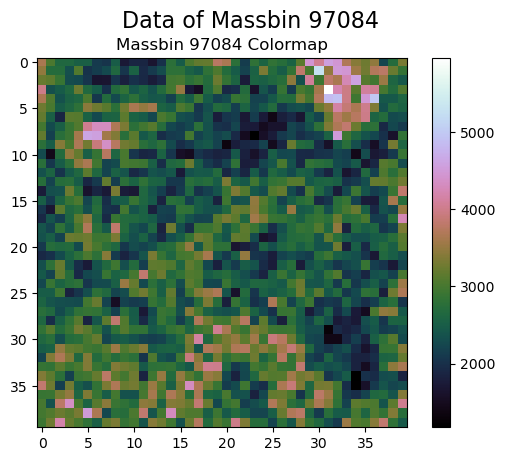

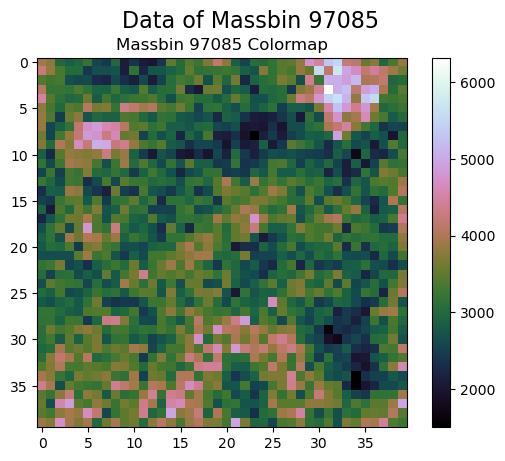

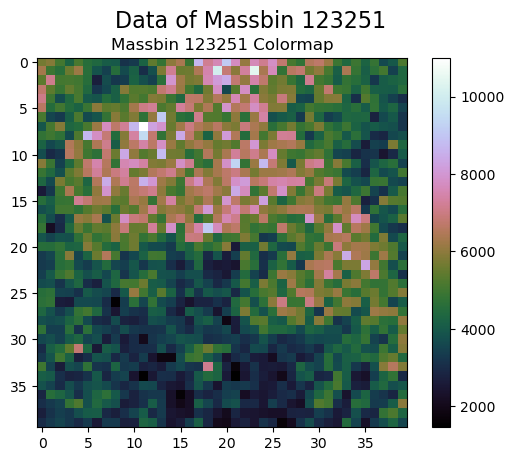

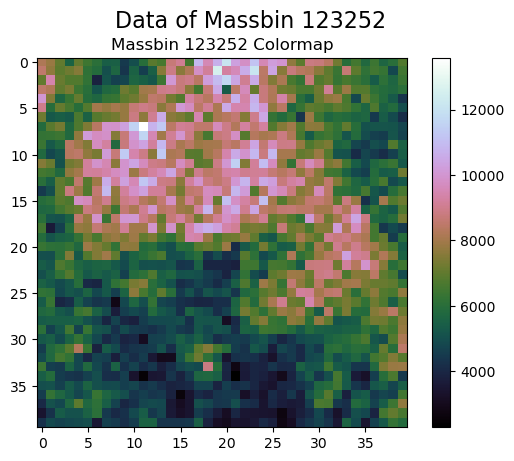

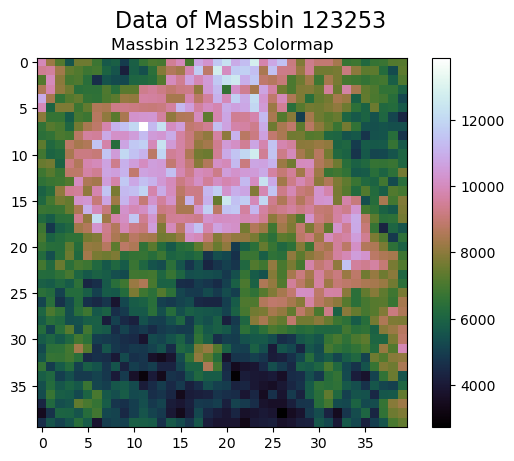

In [11]:
for m in mb[-5:]:
    visualizeMassBin(dense_matrix_format, m,shape)

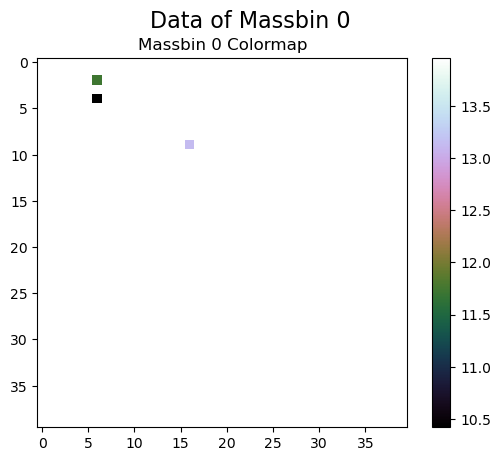

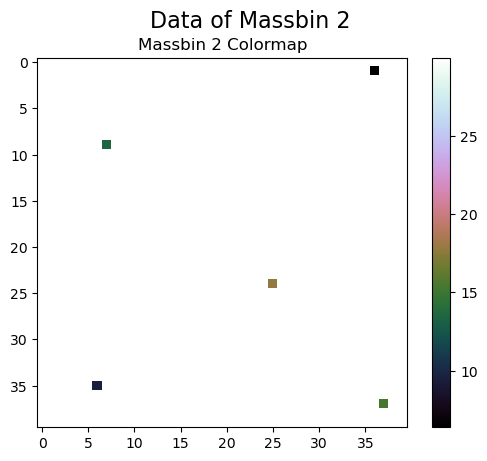

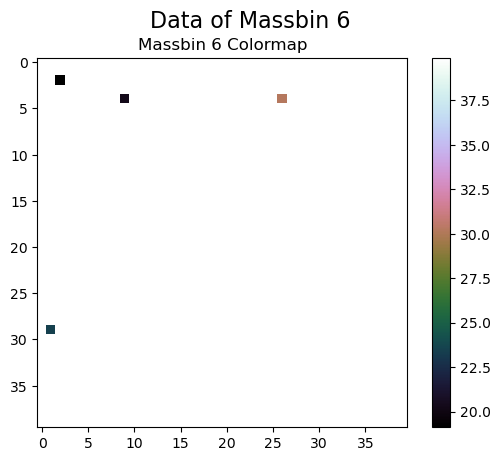

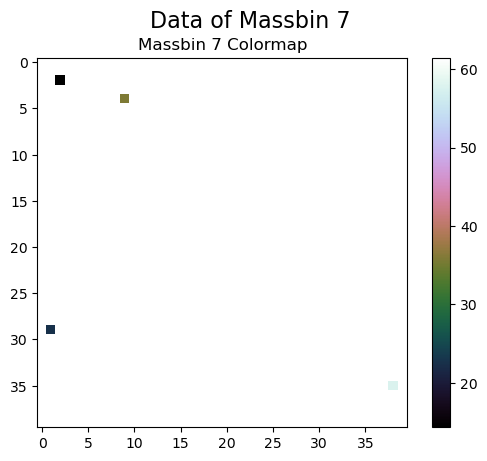

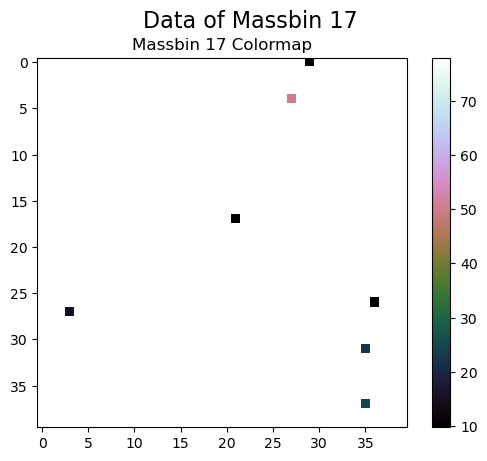

In [13]:
for m in mb[:5]:
    visualizeMassBin(nans_matrix, m,shape)